# Statics

In [81]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [55]:
tod = pd.read_csv('./Data/smartphones.csv')

In [56]:
tod.head()

Name        OS  Capacity  Ram  Weight    Company  inch
0   Galaxy S10   Android       128    8   163.0    Samsung   6.2
1    Lumia 950  windows         32    3   150.0  Microsoft   5.2
2  Xpreia 1 ll   Android       256    8   181.0       Sony   6.5
3    iphone 7        ios       128    2   138.0      Apple   4.7
4      U Ultra   Android        64    4   170.0        HTC   5.7

In [57]:
count = tod.Ram.value_counts()
count

4    3
8    2
3    2
2    2
Name: Ram, dtype: int64

In [58]:
tod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9 non-null      object 
 1   OS        9 non-null      object 
 2   Capacity  9 non-null      int64  
 3   Ram       9 non-null      int64  
 4   Weight    9 non-null      float64
 5   Company   9 non-null      object 
 6   inch      9 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 632.0+ bytes


In [59]:
catagory = count.index
catagory

Int64Index([4, 8, 3, 2], dtype='int64')

([<matplotlib.axis.XTick at 0x26244b4e640>,
 <a list of 4 Text major ticklabel objects>)

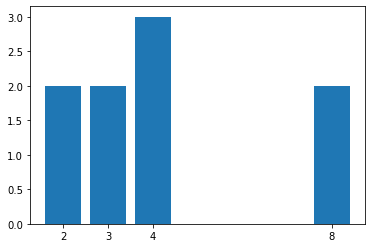

In [60]:
plt.bar(catagory,count)
plt.xticks([2,3,4,8])

In [61]:
# shwo ECDF in graph
def ECDF(data):
    n= len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
x,y = ECDF(tod.inch)
x
y

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

In [62]:
# Get the percentaile or Charak or quater(25%,50%,75%)
np.percentile(tod.inch,[25,50,75])

array([5. , 5.2, 6.2])

## Varians

In [63]:
np.var(tod.inch)

0.4335802469135802

In [64]:
np.std(tod.inch)

0.6584681062235135

# Coveriance


Text(0, 0.5, 'wight of Phone')

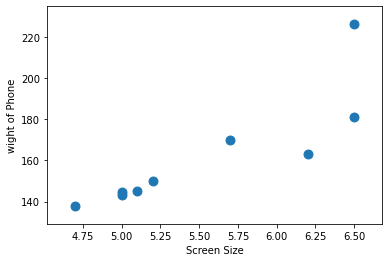

In [65]:
plt.scatter(tod.inch,tod.Weight,s=80)
plt.margins(0.1)
plt.xlabel("Screen Size")
plt.ylabel("wight of Phone")

In [66]:
np.cov(tod.inch,tod.Weight)

array([[4.87777778e-01, 1.66298611e+01],
       [1.66298611e+01, 7.74694444e+02]])

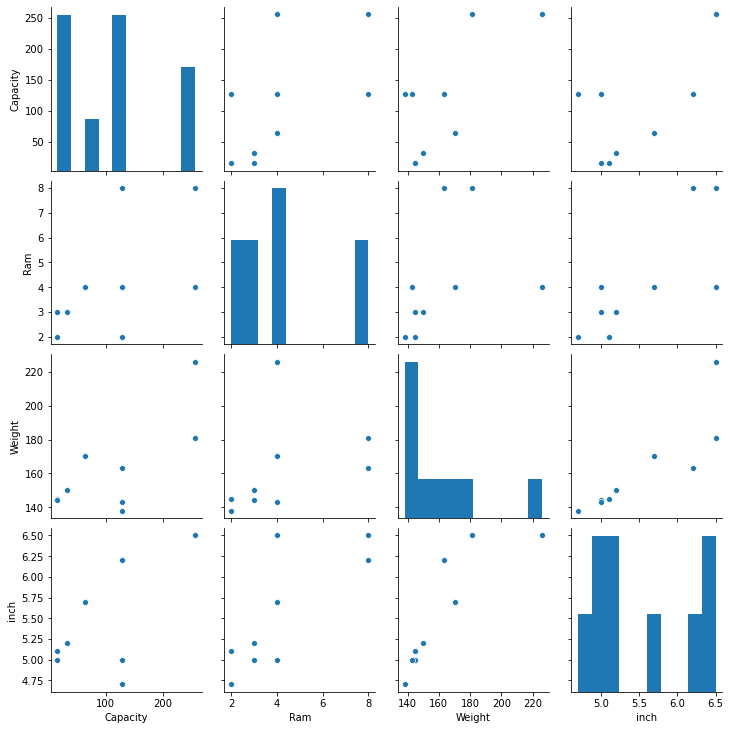

In [67]:
sb.pairplot(tod)

In [68]:
pearsonr(tod.inch,tod.Weight)

(0.8554849938477145, 0.003270259823544862)

In [69]:
tot = tod.copy()

In [70]:
tot.head()

Name        OS  Capacity  Ram  Weight    Company  inch
0   Galaxy S10   Android       128    8   163.0    Samsung   6.2
1    Lumia 950  windows         32    3   150.0  Microsoft   5.2
2  Xpreia 1 ll   Android       256    8   181.0       Sony   6.5
3    iphone 7        ios       128    2   138.0      Apple   4.7
4      U Ultra   Android        64    4   170.0        HTC   5.7

In [71]:
CO=tot.drop(['Name','OS','Capacity','Ram','Company'],axis=1)

In [72]:
cor=CO.corr()

In [73]:
cor

Weight      inch
Weight  1.000000  0.855485
inch    0.855485  1.000000

## Hitmap graph

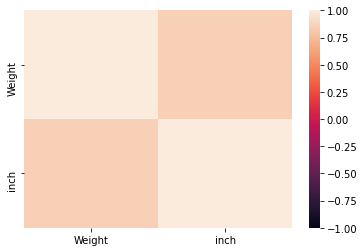

In [74]:
sb.heatmap(cor,xticklabels=CO.columns,yticklabels=CO.columns,vmin=-1,vmax=1)

In [75]:
tod.head()

Name        OS  Capacity  Ram  Weight    Company  inch
0   Galaxy S10   Android       128    8   163.0    Samsung   6.2
1    Lumia 950  windows         32    3   150.0  Microsoft   5.2
2  Xpreia 1 ll   Android       256    8   181.0       Sony   6.5
3    iphone 7        ios       128    2   138.0      Apple   4.7
4      U Ultra   Android        64    4   170.0        HTC   5.7

In [76]:
tod.head(2)

Name        OS  Capacity  Ram  Weight    Company  inch
0  Galaxy S10   Android       128    8   163.0    Samsung   6.2
1   Lumia 950  windows         32    3   150.0  Microsoft   5.2

In [79]:
cat = tod.drop(['Name','OS','Weight','Company','inch'],axis=1)

In [80]:
cat

Capacity  Ram
0       128    8
1        32    3
2       256    8
3       128    2
4        64    4
5        16    2
6       256    4
7        16    3
8       128    4

In [82]:
spearmanr(cat.Capacity,cat.Ram)

SpearmanrResult(correlation=0.6387727180404934, pvalue=0.06405417734095313)

In [87]:
num = np.random.random(1000)
w = num>0.5
num_head = np.sum(w)/1000
num_head

0.503

# Normal Distribution

In [92]:
sample = np.random.normal(0,1,size=100000)

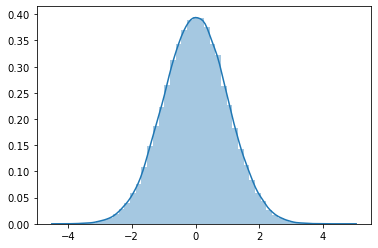

In [96]:
sb.distplot(sample)